In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [4]:
df.sample(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
132,49,M,LOW,NORMAL,13.598,drugX
145,61,M,NORMAL,HIGH,9.443,drugX


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.shape

(200, 6)

In [8]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [31]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [9]:
X=df.drop('Drug',axis=1)
y=df['Drug']


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [11]:
X_train.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [12]:
cat_col=X.select_dtypes(include='object').columns
num_col=X.select_dtypes(exclude='object').columns

In [13]:
cat_col

Index(['Sex', 'BP', 'Cholesterol'], dtype='object')

In [14]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder(
    categories=[
    ['M','F'],
    ['LOW','NORMAL','HIGH'],
    ['NORMAL','HIGH']
    ]
    
)

In [15]:
X_train[cat_col]=OE.fit_transform(X_train[cat_col])
X_test[cat_col]=OE.transform(X_test[cat_col])

In [16]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,1.0,0.0,0.0,10.840
197,52,0.0,1.0,1.0,9.894
38,39,1.0,1.0,0.0,9.709
24,33,1.0,0.0,1.0,33.486
122,34,0.0,1.0,1.0,22.456
...,...,...,...,...,...
106,22,0.0,1.0,1.0,11.953
14,50,1.0,1.0,1.0,12.703
92,29,1.0,2.0,1.0,29.450
179,67,1.0,1.0,1.0,15.891


In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3,random_state=42)

In [18]:
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

In [21]:
df.iloc[50]

Age                58
Sex                 F
BP               HIGH
Cholesterol      HIGH
Na_to_K        19.416
Drug            DrugY
Name: 50, dtype: object

In [22]:
input=pd.DataFrame({
    'Age':[58],
    'Sex':[1],
    'BP':[2],
    'Cholesterol':[1],
    'Na_to_K':[19.416]
})


In [23]:
model.predict(input)

array(['DrugY'], dtype=object)

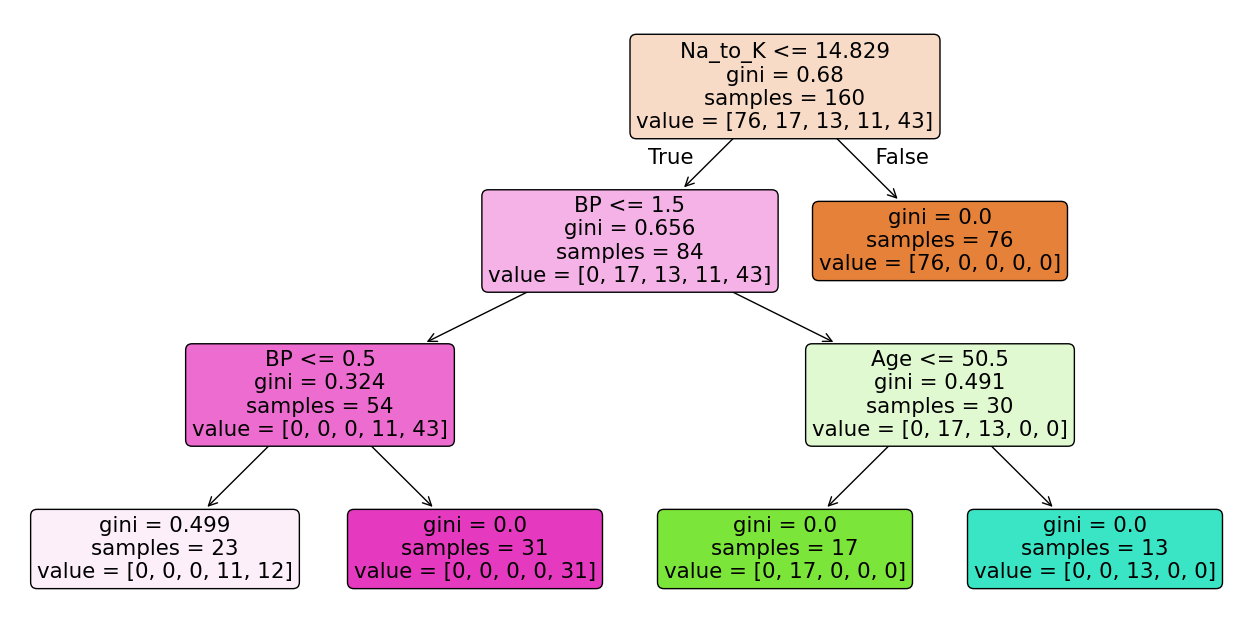

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
)
plt.show()